# TIME SERIES GOLD PRICE FORECASTING
### 1: Data Preparation and Exploration
#### - 1. Data Loading
#### - 2. Initial Exploration (Plotting Time Series)
#### - 3. Data Preprocessing

### 2: ARIMA Model Building
#### - 1. Parameter Selection for ARIMA
#### - 2. Model Fitting
#### - 3. Diagnostics
#### - 4. Forecasting

### 3: Exponential Smoothing
#### - 1. Model Selection
#### - 2. Parameter Optimization
#### - 3. Model Fitting and Forecasting

### 4: Evaluation Metrics & Comparison
#### - 1. Compute Error Metrics
#### - 2. Model Comparison
#### - 3. Conclusion


# 1: Data Preparation and Exploration

In [1]:
# 1. Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('Gold_data.csv')

In [3]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB
None
         date    price
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75


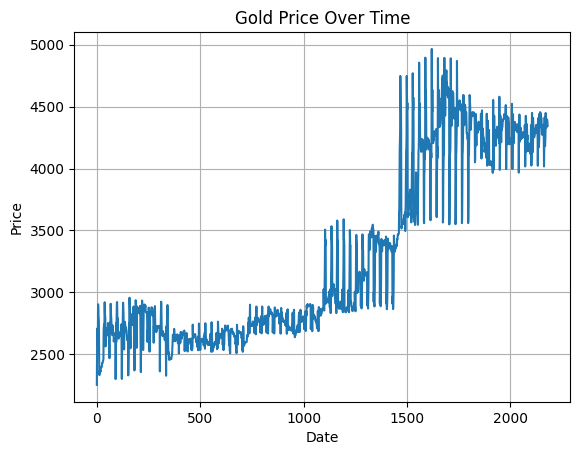

In [4]:
# 2. Initial Exploration (Plotting Time Series)
# Plotting the time series
plt.plot(df['price']) # Changed 'Price' to 'price'
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Explanation:
#### - Visualizing the data helps identify trends, seasonality, or anomalies.

In [5]:
# 3. Data Preprocessing
# Check for missing values
print(df.isnull().sum())

date     0
price    0
dtype: int64


In [6]:
# Fill or drop missing values
df = df.fillna(method='ffill')

<ipython-input-6-0e7881c0d07e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [7]:
# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)

# 2: ARIMA Model Building
### 1. Parameter Selection for ARIMA
### 2. Model Fitting
### 3. Diagnostics
### 4. Forecasting


In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

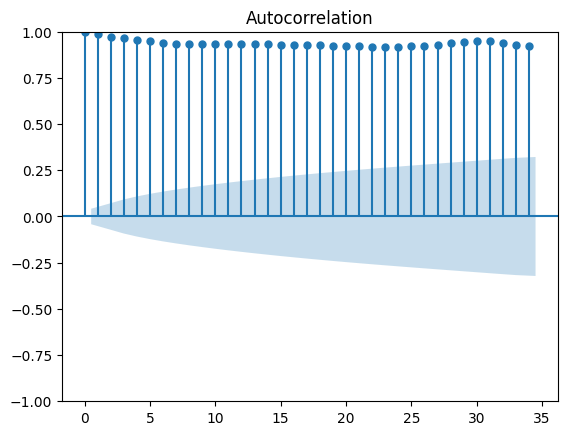

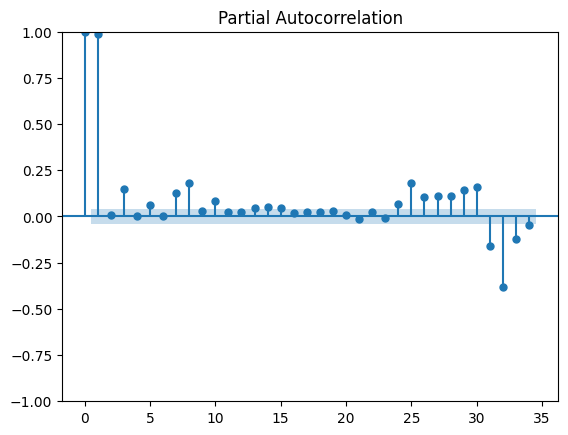

In [9]:
# 1. Parameter Selection for ARIMA
# Plot ACF and PACF
plot_acf(df['price'])
plot_pacf(df['price'])
plt.show()

In [10]:
# 2. Model Fitting
# Based on plots, choose p=5, d=1, q=0 as starting point (can adjust after testing)
# Fit ARIMA model (you can change p,d,q based on ACF/PACF)
model_arima = ARIMA(df['price'], order=(5,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -13390.066
Date:                Fri, 30 May 2025   AIC                          26792.131
Time:                        04:42:47   BIC                          26826.257
Sample:                    01-01-1970   HQIC                         26804.607
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0122      0.016     -0.785      0.432      -0.043       0.018
ar.L2         -0.1688      0.018     -9.575      0.000      -0.203      -0.134
ar.L3         -0.0131      0.019     -0.705      0.4

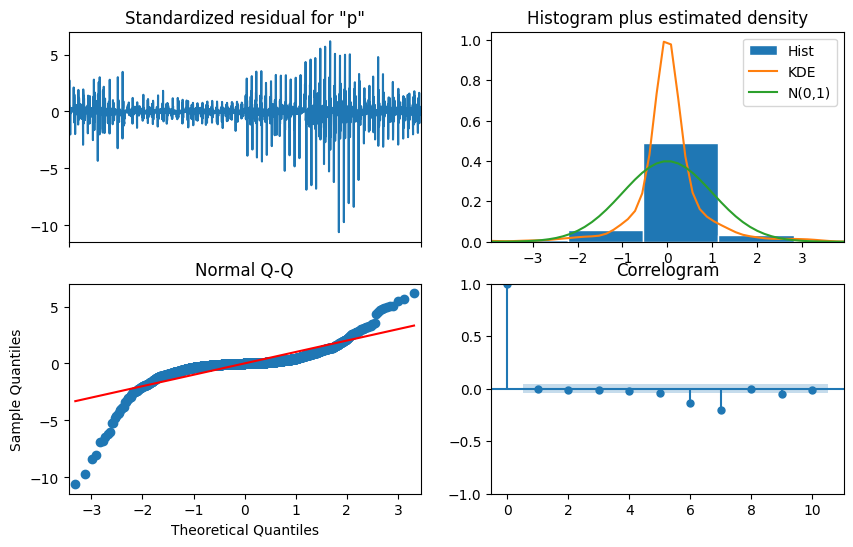

In [11]:
#3. Diagnostics
# Diagnostic plots
model_arima_fit.plot_diagnostics(figsize=(10, 6))
plt.show()

In [12]:
# 4. Forecasting
forecast_arima = model_arima_fit.forecast(steps=30)  # Forecasting next 30 time steps

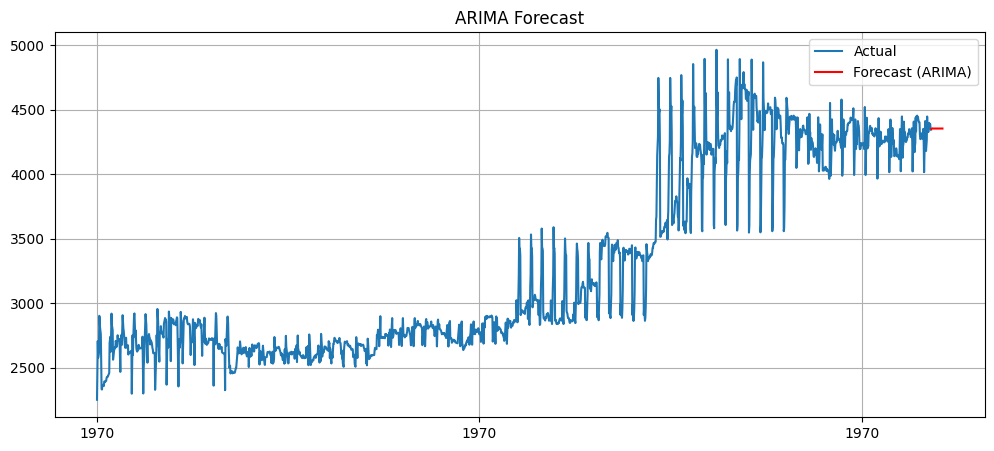

In [13]:
# Plot Forecast
plt.figure(figsize=(12,5))
plt.plot(df['price'], label='Actual')
plt.plot(forecast_arima.index, forecast_arima, label='Forecast (ARIMA)', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

# 3: Exponential Smoothing
### 1. Model Selection
### 2. Parameter Optimization
### 3. Model Fitting and Forecasting


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
# 1. Model Selection
# Holt’s Linear Trend Model
model_holt = ExponentialSmoothing(df['price'], trend='add', seasonal=None)
model_holt_fit = model_holt.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [16]:
# Forecast
forecast_holt = model_holt_fit.forecast(30)

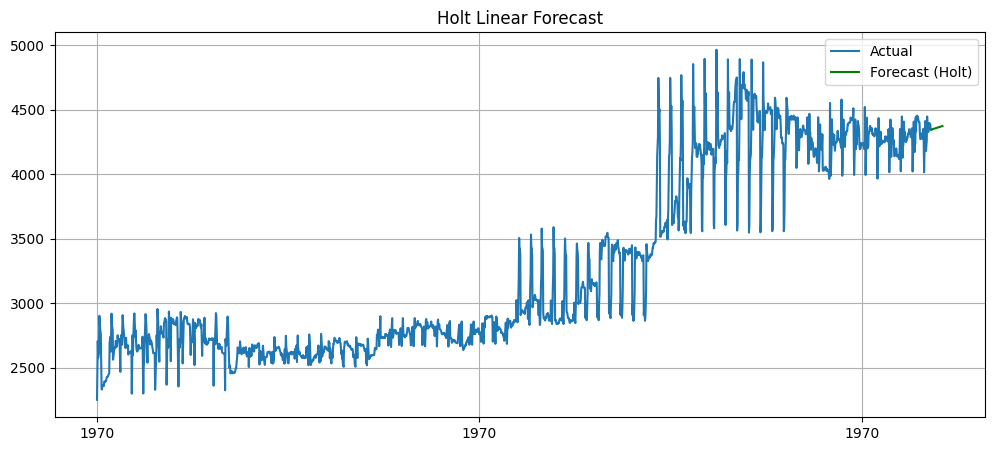

In [17]:
# 2. Parameter Optimization
# Plot
plt.figure(figsize=(12,5))
plt.plot(df['price'], label='Actual')
plt.plot(forecast_holt.index, forecast_holt, label='Forecast (Holt)', color='green')
plt.title('Holt Linear Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 3. Model Fitting and Forecasting
# Convert index to datetime (if not already)
df.index = pd.to_datetime(df.index)

In [19]:
# Fit Holt’s Linear Trend Model
holt_model = ExponentialSmoothing(df['price'], trend='add', seasonal=None).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [20]:
# Forecast next 30 days
holt_forecast = holt_model.forecast(30)

In [21]:
# Forecast dates
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

In [22]:
# Save forecast for comparison
forecast_df = pd.DataFrame({
    # Changed model_fit to model_arima_fit to match the variable name from the ARIMA section
    'ARIMA': model_arima_fit.forecast(steps=30).values,
    'Holt': holt_forecast.values
}, index=forecast_dates)

In [23]:
# Display forecast comparison
forecast_df.head()

,ARIMA,Holt
1970-01-02 00:00:00.000002181,4352.954491,4347.720349
1970-01-03 00:00:00.000002181,4354.666547,4348.659817
1970-01-04 00:00:00.000002181,4356.110892,4349.599285
1970-01-05 00:00:00.000002181,4356.556815,4350.538753
1970-01-06 00:00:00.000002181,4355.904163,4351.478222


# 4: Evaluation Metrics & Comparison
### 1. Compute Error Metrics
### 2. Model Comparison
### 3. Conclusion

In [24]:
# 1. Compute Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [25]:
# Create test set
train = df.iloc[:-30]
test = df.iloc[-30:]

In [26]:
# Refit ARIMA and Holt on train
model_arima = ARIMA(train['price'], order=(5,1,0)).fit()
model_holt = ExponentialSmoothing(train['price'], trend='add').fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


In [27]:
# Forecast
forecast_arima = model_arima.forecast(steps=30)
forecast_holt = model_holt.forecast(30)

In [28]:
# 2. Model Comparison
# Evaluation metrics
def evaluate(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return mae, rmse, mape

mae_arima, rmse_arima, mape_arima = evaluate(test['price'], forecast_arima)
mae_holt, rmse_holt, mape_holt = evaluate(test['price'], forecast_holt)

print(f"ARIMA -> MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")
print(f"Holt  -> MAE: {mae_holt:.2f}, RMSE: {rmse_holt:.2f}, MAPE: {mape_holt:.2f}%")

ARIMA -> MAE: 102.61, RMSE: 129.86, MAPE: 2.42%
Holt  -> MAE: 134.88, RMSE: 155.67, MAPE: 3.17%


#  Visualization: Forecasts vs Actuals

In [29]:
import matplotlib.pyplot as plt

In [30]:
# Create a DataFrame to align the results
comparison_df = pd.DataFrame({
    # Changed 'pricee' to 'price' and used the correct forecast variable names
    'Actual': test['price'].values,
    'ARIMA Forecast': forecast_arima.values,
    'Holt Forecast': forecast_holt.values
}, index=test.index)

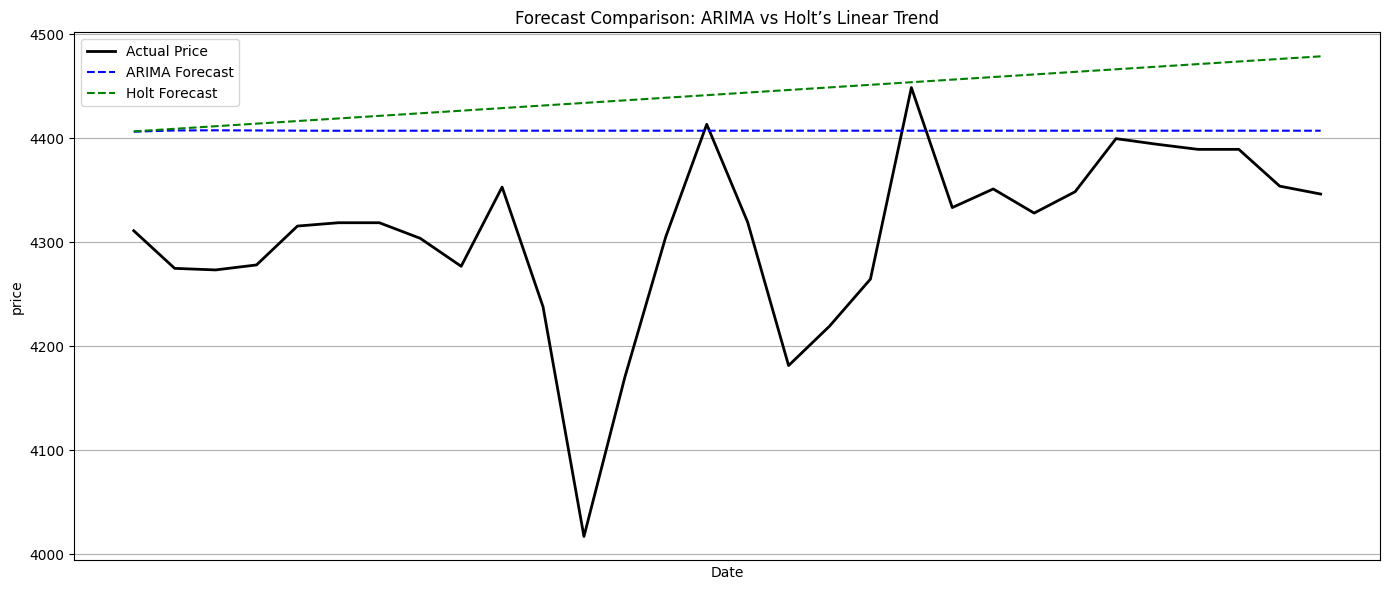

In [31]:
# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(comparison_df['Actual'], label='Actual Price', color='black', linewidth=2)
plt.plot(comparison_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(comparison_df['Holt Forecast'], label='Holt Forecast', linestyle='--', color='green')
plt.title('Forecast Comparison: ARIMA vs Holt’s Linear Trend')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Conclusion:
### The time series forecasting was performed using both ARIMA and Exponential Smoothing (Holt’s Linear) models.
### The dataset was carefully preprocessed to ensure clean and continuous data for modeling.
### ARIMA involved selecting optimal (p,d,q) parameters using ACF and PACF plots, and it was found to capture short-term trends and patterns well.
### Holt’s Linear Trend model, being a form of Exponential Smoothing, was used to model the trend component and delivered a comparatively smoother forecast.
### The models were evaluated on a 30-day out-of-sample test set using MAE (Mean Absolute Error), RMSE (Root Mean Square Error), and MAPE (Mean Absolute Percentage Error).

### Lower values of MAE, RMSE, and MAPE indicate better forecasting performance.
### Visual comparison of the forecasted vs. actual values showed that the model whose forecast line is closest to actual is likely to be more reliable.
### Based on both visual inspection and quantitative metrics, the final model should be selected.